# Ingresos anuales del sector

In [92]:
import pandas as pd

In [93]:
df = pd.read_csv(r'C:\Users\nahue\Searches\Escritorio\CARRERA HENRY\SPI\Segundo_proyecto_individual\Datasets\Ingresos.csv')

In [94]:
df.head(6)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,4.420322e+08,Abr-Jun 2024
1,2024,1,3.461990e+08,Ene-Mar 2024
2,2023,4,1.673760e+08,Oct-Dic 2023
3,2023,3,1.331066e+08,Jul-Sept 2023
4,2023,2,1.180603e+08,Jun-Mar 2023
5,2033,1,1.041350e+08,Ene-Mar 2023


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        42 non-null     int64  
 1   Trimestre                  42 non-null     int64  
 2   Ingresos (miles de pesos)  42 non-null     float64
 3   Periodo                    42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


No hay valores nulos

In [96]:
df.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,42.000000,42.000000,4.200000e+01
mean,2019.000000,2.452381,5.001648e+07
std,3.728597,1.130560,8.710208e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.250000,7.055326e+06
50%,2019.000000,2.000000,2.047527e+07
75%,2021.000000,3.000000,4.485090e+07
max,2033.000000,4.000000,4.420322e+08


In [97]:
#Hay un 2033 en el max de año lo que no está bien. Corroboro los valores:
print(df["Año"].unique())

[2024 2023 2033 2022 2021 2020 2019 2018 2017 2016 2015 2014]


In [98]:
#Busco la fila de ese año:
fila_2033 = df[df['Año'] == 2033]
fila_2033

,Año,Trimestre,Ingresos (miles de pesos),Periodo
5,2033,1,1.041350e+08,Ene-Mar 2023


In [99]:
#El valor erroneo se encuentra en la fila 5. La columna período y el df.head(6) de mas arriba dan cuenta de que es un error de tipeo. Lo corrijo.
df.loc[df['Año'] == 2033, 'Año'] = 2023

#Corroboro:
print(df["Año"].unique())

[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]


In [100]:
#Guardo el archivo limpio para la futura concatenación
df = df.to_csv('Ingresos_limpio.csv', index=False)

<span style="color:orange">*Devido a la constante inflación de los últimos, por lo menos, 20 años en Argentina, es muy difícil tener una perspectiva de los ingresos trimestrales/anuales del sector en estudio en pesos($) argentinos por lo que decidí llevar esos montos a dólares. Para ello recurrí a los datos de una página web llamada 'Dinero en el tiempo.com' que contiene los precios diarios del dolar desde 1991 hasta la fecha acotándome al período 2014-2024.*</span>

In [28]:
# Leo todas las hojas del archivo Excel en un diccionario de DataFrames
archivo_excel = pd.read_excel(r'C:\Users\nahue\Searches\Escritorio\CARRERA HENRY\SPI\Segundo_proyecto_individual\Datasets\Valor historico dolar 2014-2024.xlsx', sheet_name=None)

Como los datos de los ingresos estan dividos en trimestres, saco el promedio del precio del dólar por trimestre de cada año.

In [106]:
import pandas as pd

# Creo una lista para almacenar todos los DataFrames
dataframes = []

# Itero sobre cada hoja y agrego a la lista de DF
for nombre_hoja, df in archivo_excel.items():
    # Convierto la columna 'Fecha' en formato datetime
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    # Agrego una columna de año y trimestre
    df['Año'] = df['Fecha'].dt.year
    df['Trimestre'] = df['Fecha'].dt.quarter
    # Agrego el DF a la lista
    dataframes.append(df)

# Concateno todos los DF en uno solo
datos_todos = pd.concat(dataframes)

# Agrupo por año y trimestre y calculo el precio promedio
precios_promedio_trimestre = datos_todos.groupby(['Año', 'Trimestre'])['Precio'].mean().reset_index()

print(precios_promedio_trimestre)

     Año  Trimestre       Precio
0   2014          1  7601.109375
1   2014          2  8053.861538
2   2014          3  8292.484848
3   2014          4  8512.939394
4   2015          1  8686.859375
5   2015          2  8958.384615
6   2015          3  9253.030303
7   2015          4  7987.142273
8   2016          1    14.449846
9   2016          2    14.219538
10  2016          3    14.943788
11  2016          4    15.463692
12  2017          1    15.674462
13  2017          2    15.737538
14  2017          3    17.286615
15  2017          4    17.545385
16  2018          1    19.679846
17  2018          2    23.499538
18  2018          3    31.910462
19  2018          4    37.106818
20  2019          1    38.996406
21  2019          2    43.866615
22  2019          3    50.314394
23  2019          4    59.243030
24  2020          1    61.399231
25  2020          2    67.531875
26  2020          3    73.203030
27  2020          4    80.030312
28  2021          1    88.587969
29  2021  

Podemos ver que los datos del 2014 y 2015 están mal, posiblemente por el formato en el excel. Lo corrijo. 

In [107]:
# Convierto los precios de 2014 y 2015 
datos_todos.loc[(datos_todos['Año'] == 2014) | (datos_todos['Año'] == 2015), 'Precio'] /= 1000

# Verifico que hayan quedado bien
print(datos_todos[(datos_todos['Año'] == 2014) | (datos_todos['Año'] == 2015)].head())


       Fecha        Día  Precio   Año  Trimestre
0 2015-01-01     Jueves   8.551  2015          1
1 2015-01-02    Viernes   8.556  2015          1
2 2015-01-05      Lunes   8.552  2015          1
3 2015-01-06     Martes   8.548  2015          1
4 2015-01-07  Miércoles   8.573  2015          1


In [117]:
# Agrupo por año y trimestre y calculo el precio promedio del dolar por trimestre
precios_promedio_trimestre = datos_todos.groupby(['Año', 'Trimestre'])['Precio'].mean().reset_index()

print(precios_promedio_trimestre)

     Año  Trimestre      Precio
0   2014          1    7.601109
1   2014          2    8.053862
2   2014          3    8.292485
3   2014          4    8.512939
4   2015          1    8.686859
5   2015          2    8.958385
6   2015          3    9.253030
7   2015          4    7.987142
8   2016          1   14.449846
9   2016          2   14.219538
10  2016          3   14.943788
11  2016          4   15.463692
12  2017          1   15.674462
13  2017          2   15.737538
14  2017          3   17.286615
15  2017          4   17.545385
16  2018          1   19.679846
17  2018          2   23.499538
18  2018          3   31.910462
19  2018          4   37.106818
20  2019          1   38.996406
21  2019          2   43.866615
22  2019          3   50.314394
23  2019          4   59.243030
24  2020          1   61.399231
25  2020          2   67.531875
26  2020          3   73.203030
27  2020          4   80.030312
28  2021          1   88.587969
29  2021          2   93.961846
30  2021

In [118]:
#Renombro la columna Precio para especificar a qué precio refiere
precios_promedio_trimestre = precios_promedio_trimestre.rename(columns={'Precio': 'Precio dólar'})

Ahora sí quedaron bien.

### Ya tengo el precio del dolar por trimestre y por año. Voy a concatenar el archivo 'Ingresos' con 'precios_promedio_dolar_trimestre' para así obtener el valor de los ingresos en dólares.

In [119]:
precios_promedio_trimestre = precios_promedio_trimestre.to_csv('precios_promedio_dolar_trimestre.csv', index=False)

In [120]:
df1 = pd.read_csv(r'C:\Users\nahue\Searches\Escritorio\CARRERA HENRY\SPI\Segundo_proyecto_individual\Datasets\precios_promedio_dolar_trimestre.csv')

In [121]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           42 non-null     int64  
 1   Trimestre     42 non-null     int64  
 2   Precio dólar  42 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


In [122]:
df1.head()

,Año,Trimestre,Precio dólar
0,2014,1,7.601109
1,2014,2,8.053862
2,2014,3,8.292485
3,2014,4,8.512939
4,2015,1,8.686859


### Concateno 

In [50]:
import pandas as pd

archivo1 = pd.read_csv(r'C:\Users\nahue\Searches\Escritorio\CARRERA HENRY\SPI\Segundo_proyecto_individual\Datasets\Ingresos_limpio.csv')
archivo2 = pd.read_csv(r'C:\Users\nahue\Searches\Escritorio\CARRERA HENRY\SPI\Segundo_proyecto_individual\Datasets\precios_promedio_dolar_trimestre.csv')

# Realizo el merge de los archivos en base a las columnas 'Año' y 'Trimestre'
df_concatenado = pd.merge(archivo1, archivo2, on=['Año', 'Trimestre'])

# Reordeno columnas
columnas_reordenadas = ['Año', 'Trimestre', 'Periodo', 'Ingresos (miles de pesos)', 'Precio dólar']
df_concatenado = df_concatenado[columnas_reordenadas]

df_concatenado.head()

,Año,Trimestre,Periodo,Ingresos (miles de pesos),Precio dólar
0,2024,2,Abr-Jun 2024,4.420322e+08,885.163030
1,2024,1,Ene-Mar 2024,3.461990e+08,834.947671
2,2023,4,Oct-Dic 2023,1.673760e+08,443.608308
3,2023,3,Jul-Sept 2023,1.331066e+08,313.540615
4,2023,2,Jun-Mar 2023,1.180603e+08,232.496308


In [51]:
# Creo una nueva columna: 'Ingresos en dólares' = Ingresos (miles de pesos) / Precio dólar
df_concatenado['Ingresos en dólares'] = df_concatenado['Ingresos (miles de pesos)'] / df_concatenado['Precio dólar']

df_concatenado.head()

,Año,Trimestre,Periodo,Ingresos (miles de pesos),Precio dólar,Ingresos en dólares
0,2024,2,Abr-Jun 2024,4.420322e+08,885.163030,499379.381602
1,2024,1,Ene-Mar 2024,3.461990e+08,834.947671,414635.549098
2,2023,4,Oct-Dic 2023,1.673760e+08,443.608308,377305.861720
3,2023,3,Jul-Sept 2023,1.331066e+08,313.540615,424527.435614
4,2023,2,Jun-Mar 2023,1.180603e+08,232.496308,507794.215968


Los ingresos se ven bastante desprolijos y se dificulta entenderlos. Los acomodo de manera que se entiendan bien los miles/millones y los centavos.

In [52]:
import locale

# Configuro el locale a español de Argentina para el formato de moneda
locale.setlocale(locale.LC_ALL, 'es_AR.UTF-8')

# Desarrollo función para formatear como moneda
def formatear_moneda(valor):
    return locale.format_string('%.2f', valor, grouping=True)

# Aplico la función
df_concatenado['Ingresos (miles de pesos)'] = df_concatenado['Ingresos (miles de pesos)'].apply(formatear_moneda)
df_concatenado['Precio dólar'] = df_concatenado['Precio dólar'].apply(formatear_moneda)
df_concatenado['Ingresos en dólares'] = df_concatenado['Ingresos en dólares'].apply(formatear_moneda)

df_concatenado.head(6)

,Año,Trimestre,Periodo,Ingresos (miles de pesos),Precio dólar,Ingresos en dólares
0,2024,2,Abr-Jun 2024,"442.032.166,69","885,16","499.379,38"
1,2024,1,Ene-Mar 2024,"346.198.986,13","834,95","414.635,55"
2,2023,4,Oct-Dic 2023,"167.376.014,80","443,61","377.305,86"
3,2023,3,Jul-Sept 2023,"133.106.593,41","313,54","424.527,44"
4,2023,2,Jun-Mar 2023,"118.060.280,28","232,50","507.794,22"
5,2023,1,Ene-Mar 2023,"104.134.992,81","192,88","539.907,23"


Ahora está mas legible

## Grafico para analizar tendencias

### Tendencia de ingresos por año

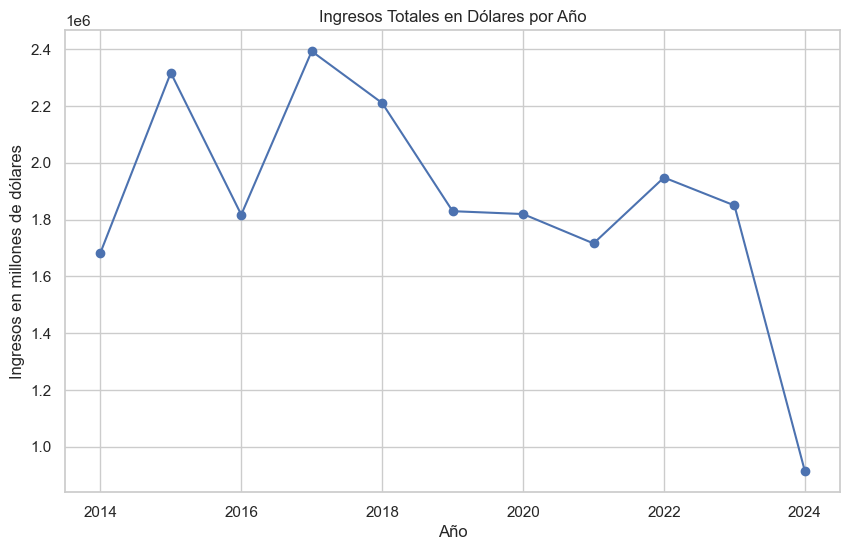

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import locale

# Función para limpiar y convertir a float para poder sumar
def limpiar_y_convertir(valor):
    # Remuevo puntos de los miles
    valor = valor.replace('.', '')
    # Reemplazo coma por punto
    valor = valor.replace(',', '.')
    # Convierto a float
    return float(valor)

# Convierto las columnas a tipo numérico
df_concatenado['Ingresos en dólares'] = df_concatenado['Ingresos en dólares'].apply(limpiar_y_convertir)

# Agrupo por año para sumar los ingresos en dólares para cada año
ingresos_anuales = df_concatenado.groupby('Año')['Ingresos en dólares'].sum().reset_index()

# Grafico los ingresos en dólares vs. años
plt.figure(figsize=(10, 6))
plt.plot(ingresos_anuales['Año'], ingresos_anuales['Ingresos en dólares'], marker='o')
plt.title('Ingresos Totales en Dólares por Año')
plt.xlabel('Año')
plt.ylabel('Ingresos en millones de dólares')
plt.grid(True)
plt.show()

*Analizaremos mas en profundidad segmentando por trimestres*

### Tendencia de ingresos por trimestre de cada año

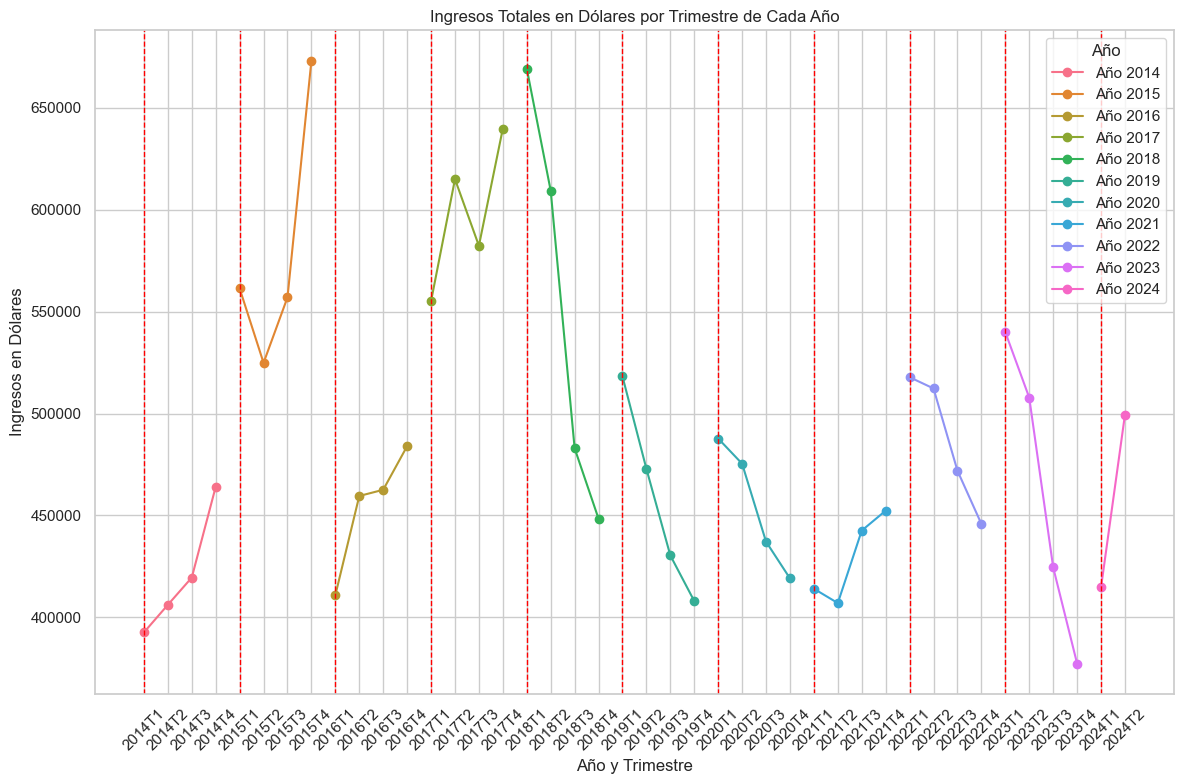

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def limpiar_y_convertir(valor):
    # Remuevo puntos de los miles
    valor = valor.replace('.', '')
    # Reemplazo coma por punto
    valor = valor.replace(',', '.')
    # Convierto a float
    return float(valor)

df_concatenado['Ingresos en dólares'] = df_concatenado['Ingresos en dólares'].apply(limpiar_y_convertir)

# Agrupo por año y trimestre para sumar los ingresos en dólares para cada trimestre
ingresos_trimestrales = df_concatenado.groupby(['Año', 'Trimestre'])['Ingresos en dólares'].sum().reset_index()

# Creo una columna que combine año y trimestre para el eje X
ingresos_trimestrales['Año_Trimestre'] = ingresos_trimestrales['Año'].astype(str) + 'T' + ingresos_trimestrales['Trimestre'].astype(str)

# Creo el gráfico con diferentes colores para cada año para mejorar la legibilidad
plt.figure(figsize=(12, 8))
palette = sns.color_palette("husl", len(ingresos_trimestrales['Año'].unique()))

for idx, year in enumerate(ingresos_trimestrales['Año'].unique()):
    df_year = ingresos_trimestrales[ingresos_trimestrales['Año'] == year]
    plt.plot(df_year['Año_Trimestre'], df_year['Ingresos en dólares'], marker='o', label=f'Año {year}', color=palette[idx])

# Agrego líneas verticales parac una mejor separación de los años
for year in ingresos_trimestrales['Año'].unique():
    plt.axvline(x=f'{year}T1', color='red', linestyle='--', linewidth=1)

plt.title('Ingresos Totales en Dólares por Trimestre de Cada Año')
plt.xlabel('Año y Trimestre')
plt.ylabel('Ingresos en Dólares')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.grid(True)
plt.tight_layout()
plt.show()


*Entre el 2014 y 2017 hay una tendencia general de ingresos en subida al pasar los trimestres.*

*A partir del 2018, aunque arranca con un pico en los ingresos, la tendencia es bajista ya sea por decisión de la población en dar de baja el servicio o reestructuraciones empresariales, ambas por crisis económicas, cepo cambiario, cambio de gobierno, pandemia, baja de poder adquisitivo e inflación incontrolable.*

*Ya para la primera mitad de 2024 puede verse una tendencia alsista.*   